In [29]:
import pysam
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
def keep_record(record):
    # We want to remove variants with uncertain locations
    return not ("CIEND" in record.info.keys() or "CIPOS" in record.info.keys())

In [5]:
vcf_path = "../to_tensor/data/estd219.GRCh37.variant_call.vcf.gz"
vcf = pysam.VariantFile(vcf_path, 'rb')

In [7]:
records = [record for record in vcf.fetch() if keep_record(record)]

In [19]:
sample_counter = defaultdict(int)
type_counter = defaultdict(int)
size_counter = defaultdict(int)
chr_counter = defaultdict(int)

In [43]:
for record in records:
    sample_counter[record.info["SAMPLE"]] += 1
    chr_counter[record.chrom] += 1
    size_counter[record.stop - record.start] += 1
    type_counter[record.info["SVTYPE"]] += 1

In [76]:
chr_len = {
    "1" :  248956422,
    "2" :  242193529,
    "3" :  198295559,
    "4" :  190214555,
    "5" :  181538259,
    "6" :  170805979,
    "7" :  159345973,
    "8" :  145138636,
    "9" :  138394717,
    "10":  133797422,
    "11":  135086622,
    "12":  133275309,
    "13":  114364328,
    "14":  107043718,
    "15":  101991189,
    "16":  90338345 ,
    "17":  83257441 ,
    "18":  80373285 ,
    "19":  58617616 ,
    "20":  64444167 ,
    "21":  46709983 ,
    "22":  50818468 ,
    "X" :  156040895,
    "Y" :  57227415 ,
}

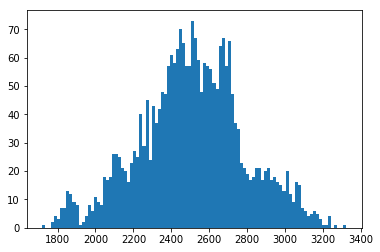

In [21]:
plt.hist(sample_counter.values(), bins=100)
plt.show()

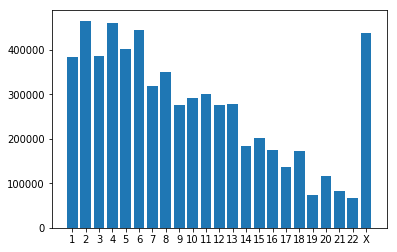

In [24]:
plt.bar(chr_counter.keys(), chr_counter.values())
plt.show()

We can see that the amount of variant decreases as the size of the chromosomes decreases.

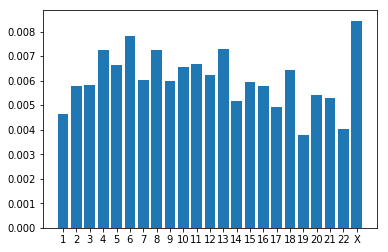

In [77]:
norm = defaultdict(float)
for x in chr_counter.keys():
    norm[x] = chr_counter[x] / chr_len[x]
    
plt.bar(norm.keys(), norm.values())
plt.show()

The amount of variants per base is relatively uniform

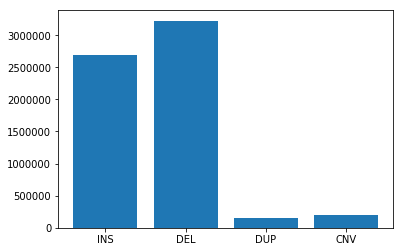

In [25]:
plt.bar(type_counter.keys(), type_counter.values())
plt.show()

In [59]:
sizes = np.array(list(size_counter.values()))
print(sizes.mean())
print(len(sizes))
percentiles = [1, 10, 20, 50, 80, 90, 99, 99.9]
print(np.percentile(sizes, percentiles))

1910.8364244451202
9867
[2.00000000e+00 2.00000000e+00 2.00000000e+00 4.00000000e+00
 2.00000000e+01 1.50800000e+02 1.61908800e+04 1.03714032e+05]


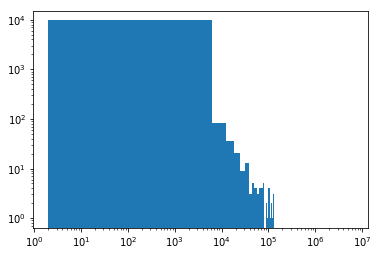

In [75]:
plt.hist(sizes, bins=1000)
plt.loglog()
plt.show()